In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as mpl
from wordcloud import WordCloud

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

In [ ]:
df = pd.read_csv("/content/IMDb Movies India.csv",encoding='latin-1')

In [ ]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.fillna(value={'Genre': 'Unknown', 'Director': 'Unknown', 'Actor 1': 'Unknown', 'Rating': df['Rating'].mean()}, inplace=True)

In [ ]:
# Split data into features and target variable
X = df[['Genre', 'Director', 'Actor 1']]
y = df['Rating']


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('Genre', OneHotEncoder(), ['Genre']),
        ('Director', OneHotEncoder(), ['Director']),
        ('Actor 1', OneHotEncoder(), ['Actor 1'])
    ])

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
])

In [ ]:
# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Genre', OneHotEncoder(),
                                                  ['Genre']),
                                                 ('Director', OneHotEncoder(),
                                                  ['Director']),
                                                 ('Actor 1', OneHotEncoder(),
                                                  ['Actor 1'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rou...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.size

155090

In [ ]:
df.iloc[10]

Name        1:1.6 An Ode to Lost Love
Year                           (2004)
Duration                       96 min
Genre                           Drama
Rating                            6.2
Votes                              17
Director                  Madhu Ambat
Actor 1                Rati Agnihotri
Actor 2                Gulshan Grover
Actor 3                 Atul Kulkarni
Name: 10, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df['Year'] = df['Year'].str.extract('(\d+)')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


In [ ]:
df["Year"].tail()

15504    1988.0
15505    1999.0
15506    2005.0
15507    1988.0
15508    1998.0
Name: Year, dtype: float64

In [ ]:
df['Duration'] = df['Duration'].str.extract('(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [ ]:
director=df['Director']
director.head(15)

0          J.S. Randhawa
1          Gaurav Bakshi
2     Soumyajit Majumdar
3             Ovais Khan
4           Amol Palekar
5           Rahul Rawail
6         Shoojit Sircar
7          Anirban Datta
8          Allyson Patel
9      Biju Bhaskar Nair
10           Madhu Ambat
11       Arshad Siddiqui
12          Partho Ghosh
13           Rabi Kinagi
14                Harish
Name: Director, dtype: object

In [ ]:
director=df['Director'].str.split(',',expand=False)
director.head(5)

0         [J.S. Randhawa]
1         [Gaurav Bakshi]
2    [Soumyajit Majumdar]
3            [Ovais Khan]
4          [Amol Palekar]
Name: Director, dtype: object

In [ ]:
genre=df['Genre']
genre.tail(15)

15494    Biography, Drama, History
15495                          NaN
15496                       Action
15497                        Drama
15498         Action, Crime, Drama
15499                       Action
15500                       Action
15501         Action, Crime, Drama
15502                       Action
15503         Action, Crime, Drama
15504                       Action
15505                Action, Drama
15506                       Action
15507                       Action
15508                Action, Drama
Name: Genre, dtype: object

In [ ]:
genres=df['Genre'].str.split(',',expand=True)
genres.tail(12)

,0,1,2
15497,Drama,None,None
15498,Action,Crime,Drama
15499,Action,None,None
15500,Action,None,None
15501,Action,Crime,Drama
15502,Action,None,None
15503,Action,Crime,Drama
15504,Action,None,None
15505,Action,Drama,None
15506,Action,None,None


In [ ]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        genre = str(genre)  # Convert genre to string
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")


 Action: 56
 Adventure: 289
 Biography: 53
 Comedy: 468
 Crime: 863
 Drama: 2726
 Family: 782
 Fantasy: 266
 History: 178
 Horror: 121
 Music: 74
 Musical: 424
 Mystery: 365
 News: 9
 Reality-TV: 1
 Romance: 1687
 Sci-Fi: 48
 Short: 1
 Sport: 59
 Thriller: 927
 War: 39
 Western: 5
Action: 3487
Adventure: 252
Animation: 125
Biography: 155
Comedy: 1561
Crime: 459
Documentary: 383
Drama: 4517
Family: 161
Fantasy: 192
History: 29
Horror: 403
Music: 16
Musical: 165
Mystery: 148
Reality-TV: 2
Romance: 762
Sci-Fi: 10
Sport: 11
Thriller: 786
War: 8
nan: 5631


In [ ]:
import operator

# Initialize the genre counts dictionary
genre_counts = {}

# Count the occurrences of each genre
for genre in genres.values.flatten():
    if genre is not None:
        genre = str(genre)  # Convert genre to string
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Calculate the total number of genres
total_genres = sum(genre_counts.values())

# Create a sorted dictionary of genre counts
# Sort by genre name
sorted_by_genre = {genre: count for genre, count in sorted(genre_counts.items())}

# Sort by count (descending)
sorted_by_count = {genre: count for genre, count in sorted(genre_counts.items(), key=operator.itemgetter(1), reverse=True)}

# Display the total number of genres
print(f"Total genres: {total_genres}\n")

# Display the sorted genres and their counts
print("Genres sorted by name:")
for genre, count in sorted_by_genre.items():
    percentage = (count / total_genres) * 100
    print(f"{genre}: {count} ({percentage:.2f}%)")

print("\nGenres sorted by count:")
for genre, count in sorted_by_count.items():
    percentage = (count / total_genres) * 100
    print(f"{genre}: {count} ({percentage:.2f}%)")

# Optionally, display the top N genres by count
N = 5
print(f"\nTop {N} genres by count:")
top_n_genres = list(sorted_by_count.items())[:N]
for genre, count in top_n_genres:
    percentage = (count / total_genres) * 100
    print(f"{genre}: {count} ({percentage:.2f}%)")


Total genres: 28704

Genres sorted by name:
 Action: 56 (0.20%)
 Adventure: 289 (1.01%)
 Biography: 53 (0.18%)
 Comedy: 468 (1.63%)
 Crime: 863 (3.01%)
 Drama: 2726 (9.50%)
 Family: 782 (2.72%)
 Fantasy: 266 (0.93%)
 History: 178 (0.62%)
 Horror: 121 (0.42%)
 Music: 74 (0.26%)
 Musical: 424 (1.48%)
 Mystery: 365 (1.27%)
 News: 9 (0.03%)
 Reality-TV: 1 (0.00%)
 Romance: 1687 (5.88%)
 Sci-Fi: 48 (0.17%)
 Short: 1 (0.00%)
 Sport: 59 (0.21%)
 Thriller: 927 (3.23%)
 War: 39 (0.14%)
 Western: 5 (0.02%)
Action: 3487 (12.15%)
Adventure: 252 (0.88%)
Animation: 125 (0.44%)
Biography: 155 (0.54%)
Comedy: 1561 (5.44%)
Crime: 459 (1.60%)
Documentary: 383 (1.33%)
Drama: 4517 (15.74%)
Family: 161 (0.56%)
Fantasy: 192 (0.67%)
History: 29 (0.10%)
Horror: 403 (1.40%)
Music: 16 (0.06%)
Musical: 165 (0.57%)
Mystery: 148 (0.52%)
Reality-TV: 2 (0.01%)
Romance: 762 (2.65%)
Sci-Fi: 10 (0.03%)
Sport: 11 (0.04%)
Thriller: 786 (2.74%)
War: 8 (0.03%)
nan: 5631 (19.62%)

Genres sorted by count:
nan: 5631 (19.62%)


In [ ]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()
actors.tail(25)

Anand Tripathi                1
Parduman                      1
Rita Katyal                   1
Gufi Paintal                  1
Anoop Chandran                1
Gabriela Bertante             1
Abha Parmar                   1
Khusboo Gupta                 1
Theertha Prasad               1
Saheen Aman                   1
Anand Joshi                   1
Michelle D'Alessandro Hatt    1
Prameela                      1
Khushboo Sawan                1
Sangam Shukla                 1
Nishat Mallick                1
Roopesh Kothari               1
B. Nandrekar                  1
Vijantimala                   1
M.V. Vasudeva Rao             1
Jean Denis Römer              1
Nandita Thakur                1
Priyal Gor                    1
Reeta Anchan                  1
Valerie Agha                  1
Name: count, dtype: int64

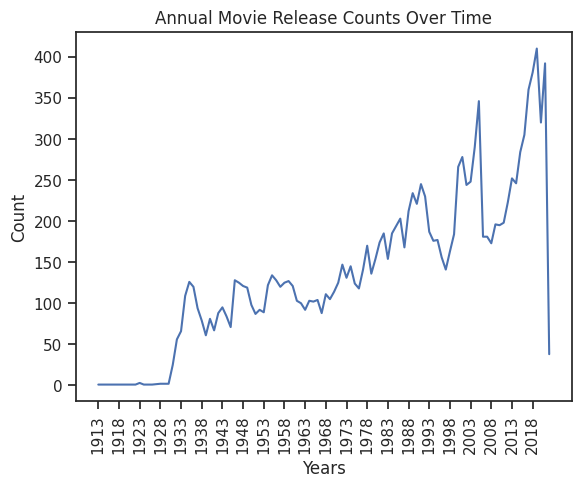

In [ ]:
ax = sb.lineplot(data=df['Year'].value_counts().sort_index())
tick_positions = range(min(df['Year']), max(df['Year']) + 1, 5)
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel("Count")
mpl.show()

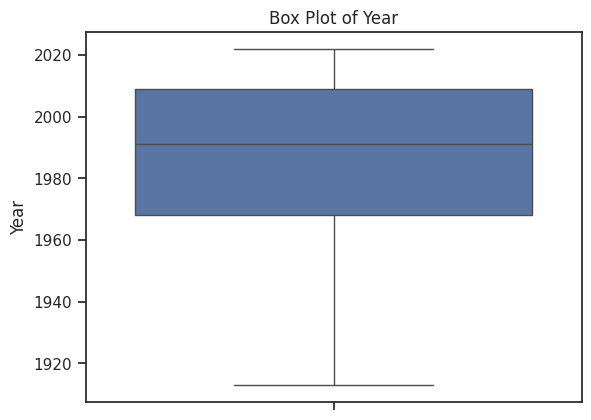

In [ ]:
ax = sb.boxplot(data=df, y='Year')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')
mpl.show()

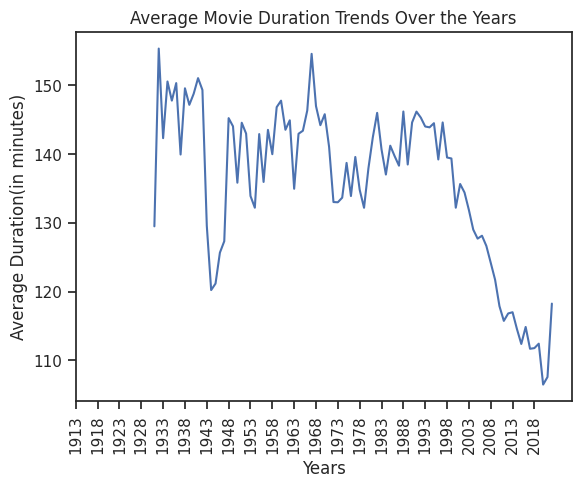

In [ ]:
ax = sb.lineplot(data=df.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
tick_positions = range(min(df['Year']), max(df['Year']) + 1, 5)
ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration(in minutes)')
mpl.show()

In [ ]:
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Duration'] >= lower_bound) & (df['Duration'] <= upper_bound)]
df.tail(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15464,Zindagi Aur Hum,1962,127.0,Unknown,5.841621,NaN,Anand Kumar,David Abraham,Nalini Jaywant,Leela Mishra
15466,Zindagi Aur Maut,1965,134.0,Drama,6.000000,5,Nisar Ahmad Ansari,Nisar Ahmad Ansari,Chandrima Bhaduri,Bela Bose
15467,Zindagi Aur Maut,2002,119.0,Action,5.841621,NaN,Ramesh U. Lakhiani,Arun Mathur,Anil Nagrath,Amit Pachori
15470,Zindagi Ek Safar,1988,120.0,"Documentary, Biography, Musical",8.200000,33,Sandip Ray,Kishore Kumar,Amitabh Bachchan,Asha Bhosle
15471,Zindagi Jalebi,2013,117.0,Comedy,3.700000,6,Karan Kashyap,Mukesh Choudhary,Muntazir Ahmad,Avinash Bhargava
15474,Zindagi Khoobsoorat Hai,2002,126.0,"Drama, Family",5.500000,51,Kajal Naskar,Manoj Punj,Gurdas Maan,Tabu
15476,Zindagi Na Milegi Dobara,2011,155.0,"Comedy, Drama",8.200000,"70,344",Zoya Akhtar,Hrithik Roshan,Farhan Akhtar,Abhay Deol
15478,Zindagi Tere Naam,2012,120.0,Romance,4.400000,33,Ashu Trikha,Mithun Chakraborty,Ranjeeta Kaur,Priyanka Mehta
15479,Zindagi Tumse,2019,120.0,Family,6.000000,13,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri
15480,Zindagi Unlimited,2021,105.0,Unknown,5.841621,NaN,Vipin Agnihotri,Amit Pandey,Kanchi Rohela,Kritika Sanghavi


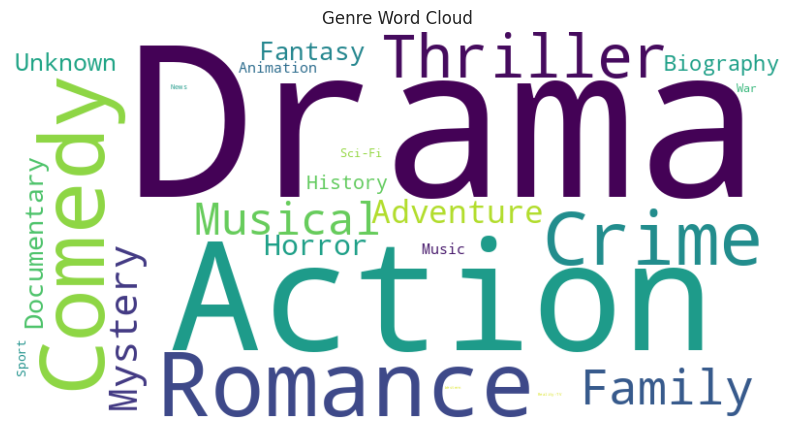

In [ ]:

genre_counts = df['Genre'].str.split(', ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

mpl.figure(figsize=(10, 6))
mpl.imshow(wordcloud, interpolation='bilinear')
mpl.axis('off')
mpl.title('Genre Word Cloud')
mpl.show()

<ipython-input-76-5edd337f6e10>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=genreLabels, rotation = 90)


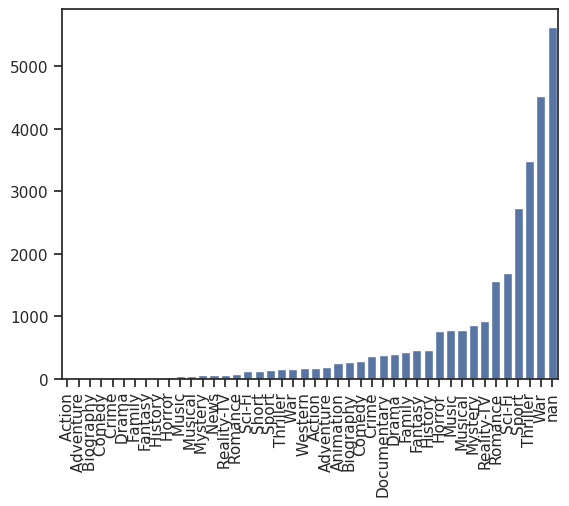

In [ ]:
genreLabels = sorted(genereCounts.keys())
genreCounts = sorted(genereCounts.values())
ax = sb.barplot(x = genreLabels, y = genreCounts)
ax.set_xticklabels(labels=genreLabels, rotation = 90)
mpl.show()

In [ ]:
genresPie = df['Genre'].value_counts()
genresPie.head(5)

Genre
Drama                   1127
Drama, Romance           347
Action, Crime, Drama     338
Action                   255
Comedy                   226
Name: count, dtype: int64

In [ ]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})
genrePie.head(5)

,Genre,Count
0,Drama,1127
1,"Drama, Romance",347
2,"Action, Crime, Drama",338
3,Action,255
4,Comedy,226


In [ ]:
genrePie.loc[genrePie['Count'] < 50, 'Genre'] = 'Other'
ax = px.pie(genrePie, values='Count', names='Genre', title='More than one Genre of movies in Indian Cinema')
ax.show()